In [28]:
from data_handlers import StockHistDataHandler,ComputeSuite
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import xarray as xr
data_handler = StockHistDataHandler()
from utilities.function_utilities import *

In [29]:
static = data_handler(sql = "select * from securities")
np.unique(static["sector"])

array(['Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities'], dtype=object)

In [36]:
tickers = data_handler(sql = "select ticker from securities ").values.ravel()
ts_range = ["2000-01-05", "2010-01-20"]
selected_tickers = tickers
all_data = data_handler.get_data(ticker = selected_tickers, invest_horizen = ts_range)

In [37]:
start_trading = "2000-01-5"
returns = ComputeSuite.pct_return(all_data.loc[:,:,start_trading:])
returns.loc[:,"MARKET"] = returns.mean(axis=1)


In [50]:
def buy_low(sub_df):
    if len(sub_df)<1:   
        return np.nan*np.ones_like(sub_df.columns)
    sig = np.zeros(sub_df.shape[1])
    ########do not change the above line: todo: make a general decorator
    
    
    previous_market = np.nanmean(sub_df.values[-2])
    begin_returns = sub_df.values[0]
    previous_returns = sub_df.values[-2]
    actual_returns = sub_df.values[-1]
    mkt_condition = (previous_market>0.00)
    stock_condition = (previous_returns<-0.02)& (begin_returns<0.0)

    
    sig[stock_condition&mkt_condition] = actual_returns[stock_condition&mkt_condition]
    return sig
        
buy_returns = rolling_apply_ext(3, returns, buy_low)

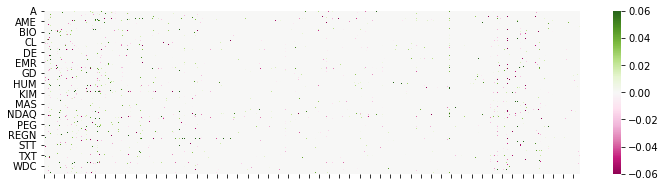

In [51]:
fig = plt.figure(figsize=(12,3))
_ = sns.heatmap(np.clip(buy_returns,-0.06,0.06).T,cmap="PiYG").set(xticklabels=[])


In [52]:
from scipy.stats import skew,kurtosis

buy:0.21695
mkt:0.07158


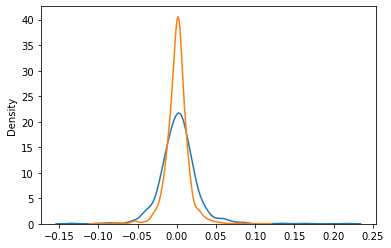

In [53]:
buy_returns[buy_returns==0]=np.nan
sns.kdeplot(np.nanmean(buy_returns,axis=1))
sns.kdeplot(returns["MARKET"].values)

print(f"buy:{100*np.nanmean(np.nanmean(buy_returns,axis=1)):.5f}")
print(f"mkt:{100*np.nanmean(returns['MARKET'].values):.5f}")